# Stroke Prognosis: Análisis exploratorio de los datos (EDA)

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>

In [2]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importación de datos
dataset = pd.read_csv("all-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Revisión de valores únicos por columna
cols = dataset.columns.tolist()
for col in cols:
    print(f"{col}: {dataset[col].unique()}")
    

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.

In [ ]:
# Formateo de los datos
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,4,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,NaN,1,1
2,1,80.0,0,1,1,4,0,105.92,32.5,1,1
3,0,49.0,0,0,1,4,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,1,1


In [6]:
# Analisis de missing values
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
# Eliminar filas con valores perdidos
dataset_no_bmi = dataset.drop("bmi", axis=1)
original_dataser = dataset.copy()
dataset = dataset.dropna()
print(dataset.isna().sum())
print(dataset_no_bmi.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64


In [8]:
# Revisión de duplicados
print(dataset.duplicated().sum())

0


In [9]:
# Dividir el dataset en personas con y sin stroke
stroke_data = dataset[dataset['stroke'] == 1]
no_stroke_data = dataset[dataset['stroke'] == 0]

# Sobre-representar los datos de stroke
stroke_data_overrepresented = pd.concat([stroke_data] * 22, ignore_index=True)

# Combinar los datasets
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Segundo Balanceo
# Dividir el dataset en personas con y sin stroke
stroke_data = dataset_no_bmi[dataset_no_bmi['stroke'] == 1]
no_stroke_data = dataset_no_bmi[dataset_no_bmi['stroke'] == 0]

# Sobre-representar los datos de stroke
stroke_data_overrepresented = pd.concat([stroke_data] * 19, ignore_index=True)

# Combinar los datasets
balanced_dataset2 = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset2 = balanced_dataset2.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el balance
print('Dataset original:', dataset['stroke'].value_counts())
print('Dataset sin IMC:', dataset_no_bmi['stroke'].value_counts())
print('Dataset original balanceado:', balanced_dataset['stroke'].value_counts())
print('Dataset sin IMC balanceado:', balanced_dataset2['stroke'].value_counts())

Dataset original: stroke
0    4700
1     209
Name: count, dtype: int64
Dataset sin IMC: stroke
0    4861
1     249
Name: count, dtype: int64
Dataset original balanceado: stroke
0    4700
1    4598
Name: count, dtype: int64
Dataset sin IMC balanceado: stroke
0    4861
1    4731
Name: count, dtype: int64


In [10]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,3.127928,0.507232,105.305150,28.893237,1.168670,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.140824,0.499999,44.424341,7.854067,1.022201,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,4.000000,1.000000,91.680000,28.100000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,4.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [11]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
dataset_no_bmi.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,3.130333,0.508023,106.147677,1.179843,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.136866,0.499985,45.283560,1.029961,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,4.000000,1.000000,91.885000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,4.000000,1.000000,114.090000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,1.000000


In [12]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
balanced_dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000
mean,0.417509,54.594334,0.184018,0.116477,0.764681,3.230157,0.513982,119.119897,29.638137,1.328458,0.494515
std,0.493393,22.242403,0.387520,0.320813,0.424221,1.028761,0.499831,55.573096,7.211653,1.002680,0.499997
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,1.000000,2.000000,0.000000,78.505000,24.900000,1.000000,0.000000
50%,0.000000,58.000000,0.000000,0.000000,1.000000,4.000000,1.000000,96.985000,28.700000,1.000000,0.000000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,4.000000,1.000000,144.997500,33.400000,2.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [13]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
balanced_dataset2.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
count,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000,9592.000000
mean,0.423374,54.675329,0.175771,0.116972,0.762406,3.219558,0.523978,118.482084,1.296601,0.493224
std,0.494330,22.298623,0.380645,0.321404,0.425631,1.032453,0.499451,55.230289,1.014501,0.499980
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,1.000000,2.000000,0.000000,78.180000,1.000000,0.000000
50%,0.000000,59.000000,0.000000,0.000000,1.000000,4.000000,1.000000,96.800000,1.000000,0.000000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,4.000000,1.000000,144.900000,2.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,3.000000,1.000000


In [14]:
# Revisión de tipos de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


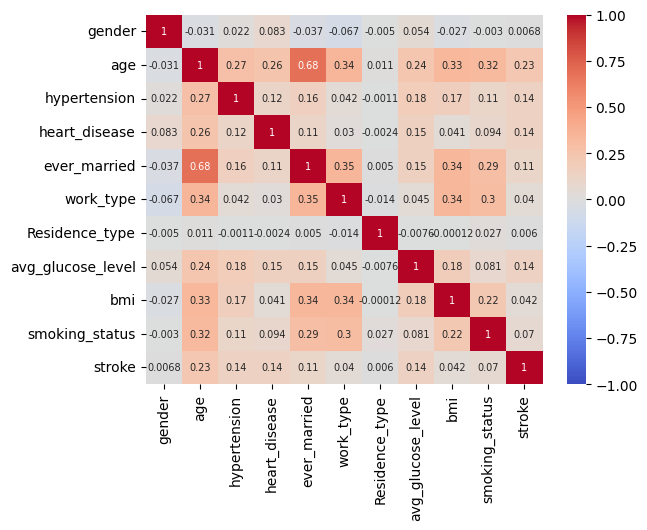

In [15]:
# Revisión de la corralación entre variables
numeric_df = dataset.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 7}, vmin=-1, vmax=1)
plt.show()

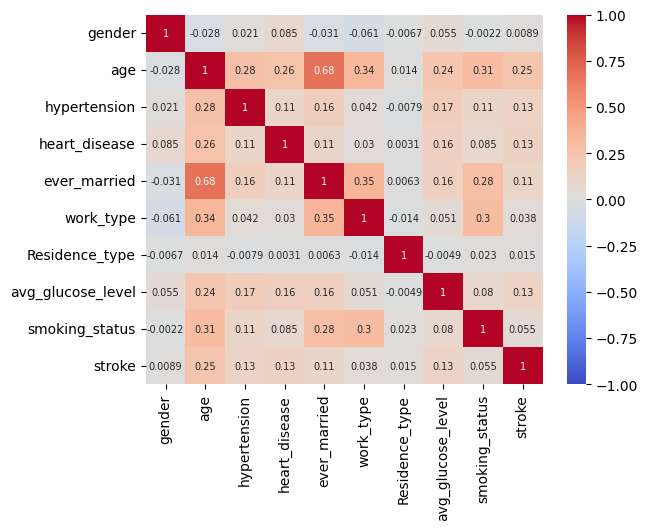

In [16]:
# Revisión de la corralación entre variables
numeric_df = dataset_no_bmi.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 7}, vmin=-1, vmax=1)
plt.show()

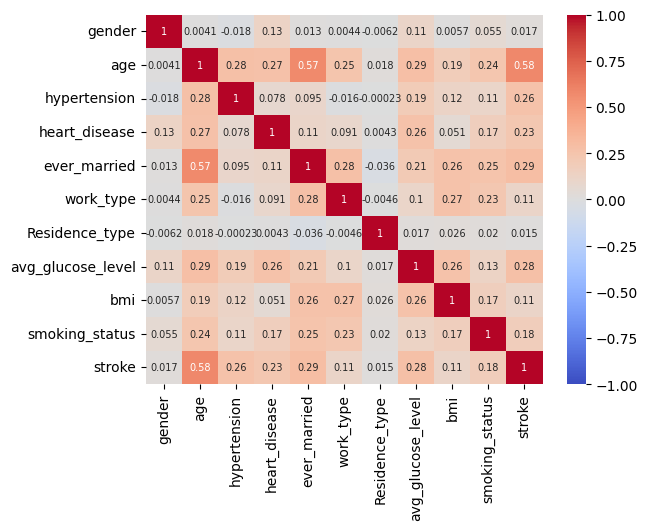

In [17]:
# Revisión de la corralación entre variables
numeric_df = balanced_dataset.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 7}, vmin=-1, vmax=1)
plt.show()

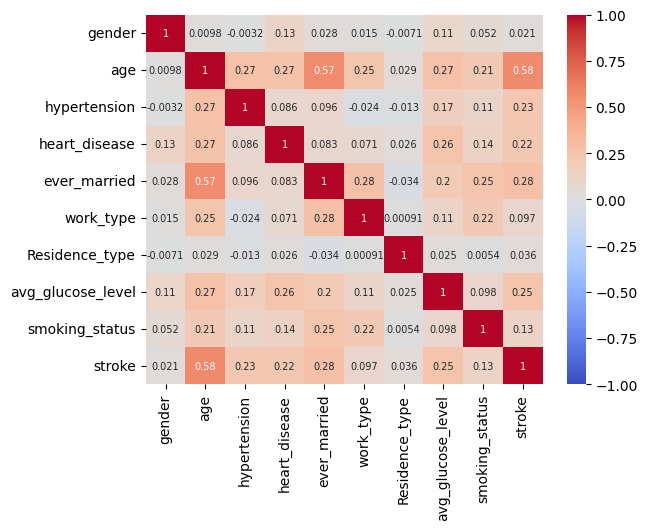

In [18]:
# Revisión de la corralación entre variables
numeric_df = balanced_dataset2.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 7}, vmin=-1, vmax=1)
plt.show()

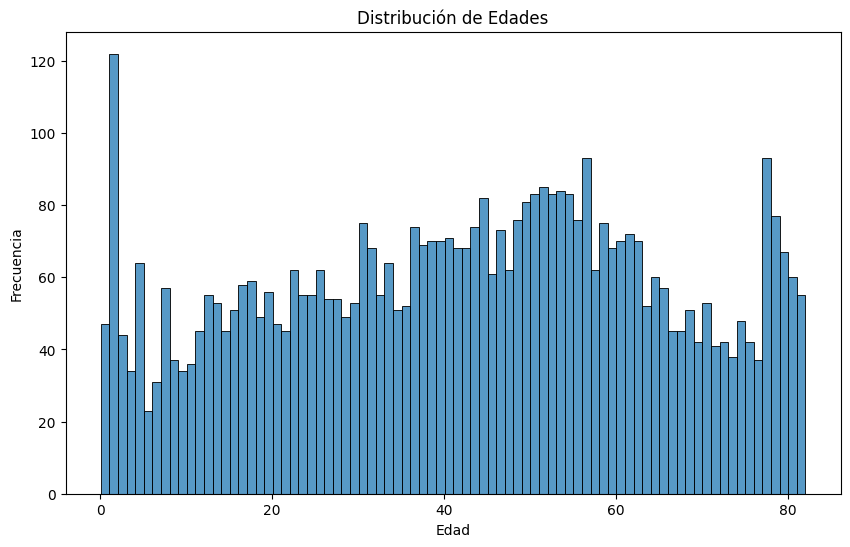

In [19]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], bins=82)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

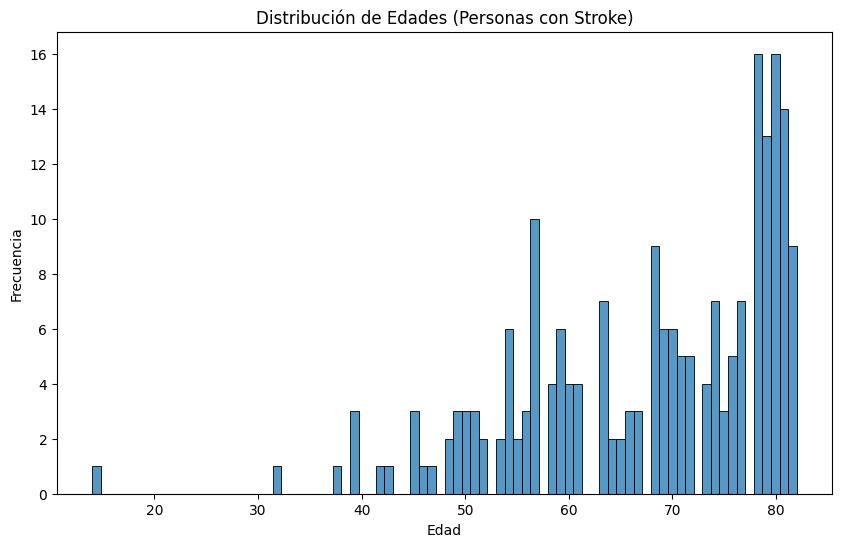

In [ ]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(dataset_no_bmi['age'], bins=82)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

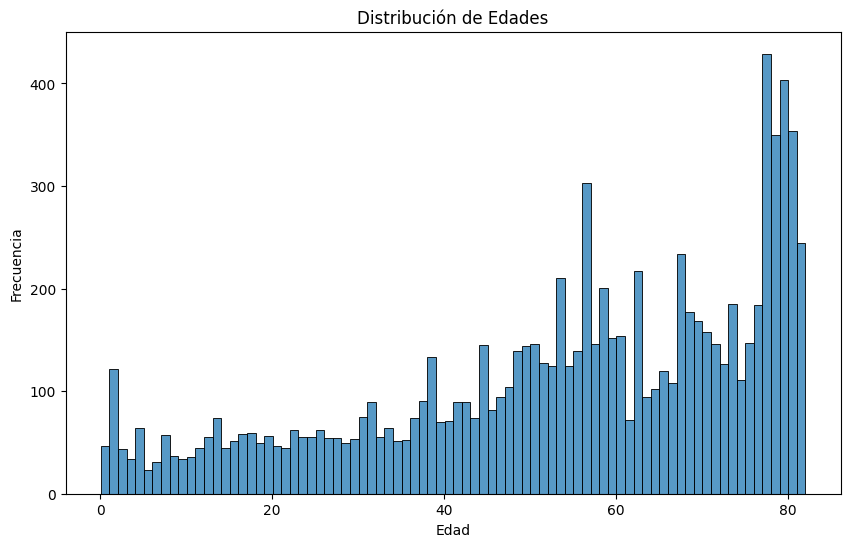

In [21]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(balanced_dataset['age'], bins=82)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

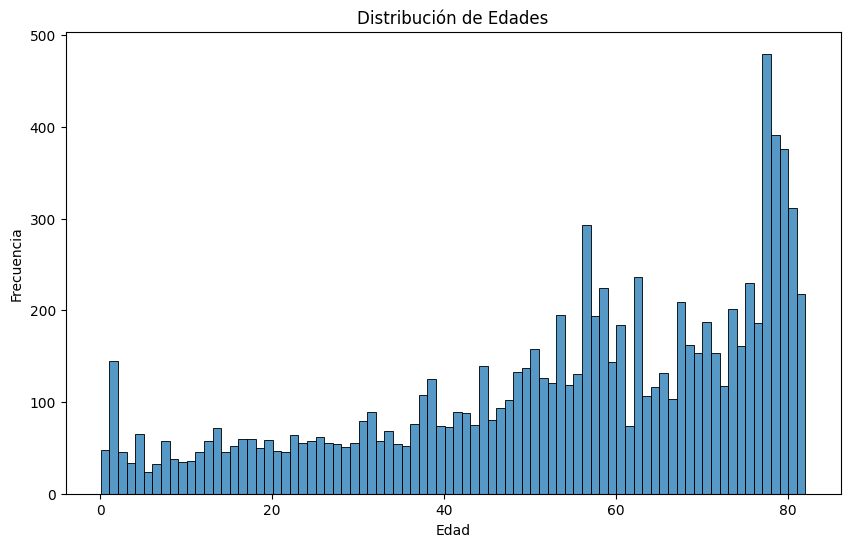

In [22]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(balanced_dataset2['age'], bins=82)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

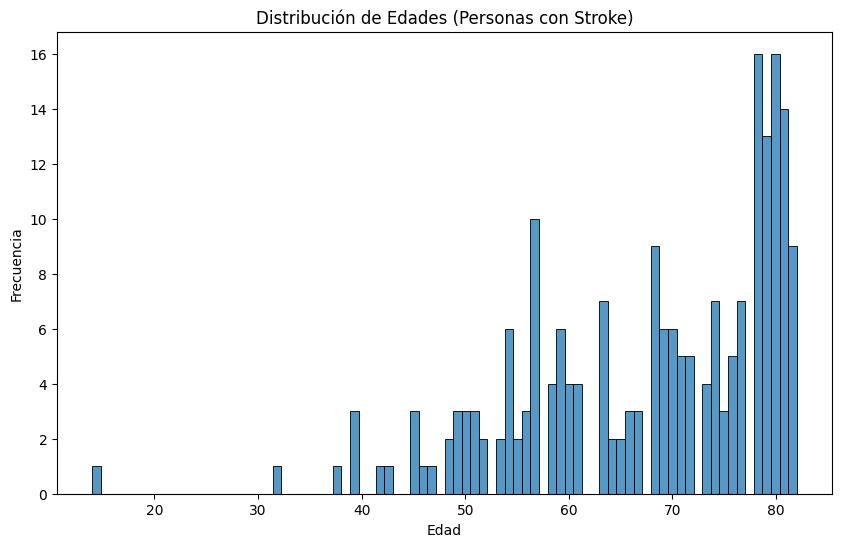

In [60]:
# Revisión de la distribución de las edades para solo las personas que tiene stroke
original_dataset_stroke = original_dataser[original_dataser['stroke'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset_stroke['age'], bins=82)
plt.title('Distribución de Edades (Personas con Stroke)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

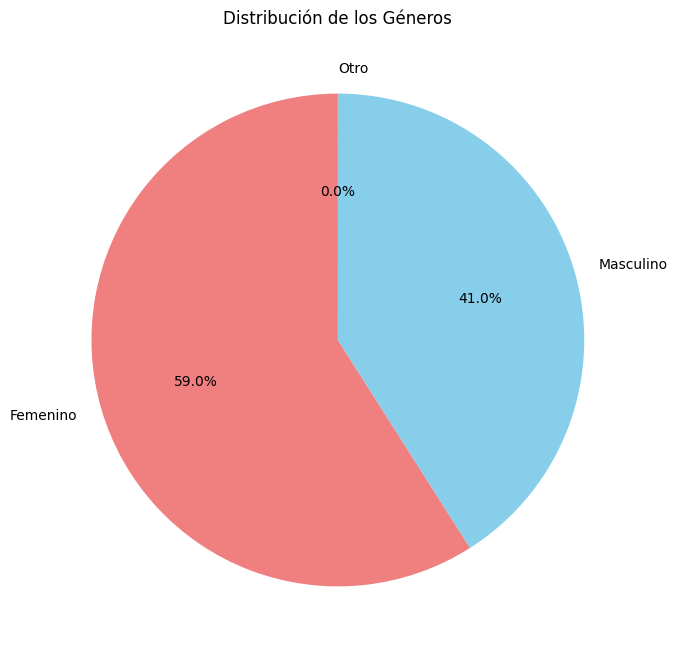

In [23]:
# Revisión de la distribución de los géneros
gender_counts = dataset['gender'].value_counts()
gender_labels = ['Masculino' if gender == 1 else 'Femenino' if gender == 0 else 'Otro' for gender in gender_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución de los Géneros')
plt.show()

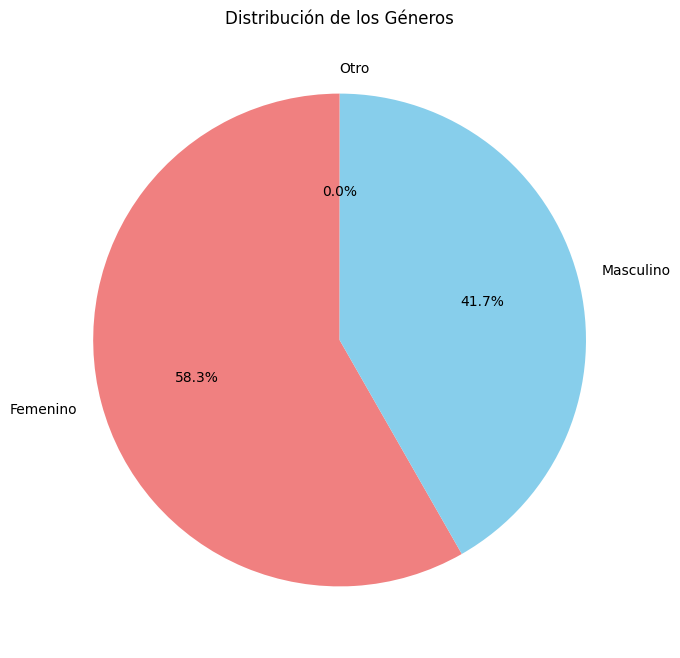

In [24]:
# Revisión de la distribución de los géneros
gender_counts = balanced_dataset['gender'].value_counts()
gender_labels = ['Masculino' if gender == 1 else 'Femenino' if gender == 0 else 'Otro' for gender in gender_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución de los Géneros')
plt.show()

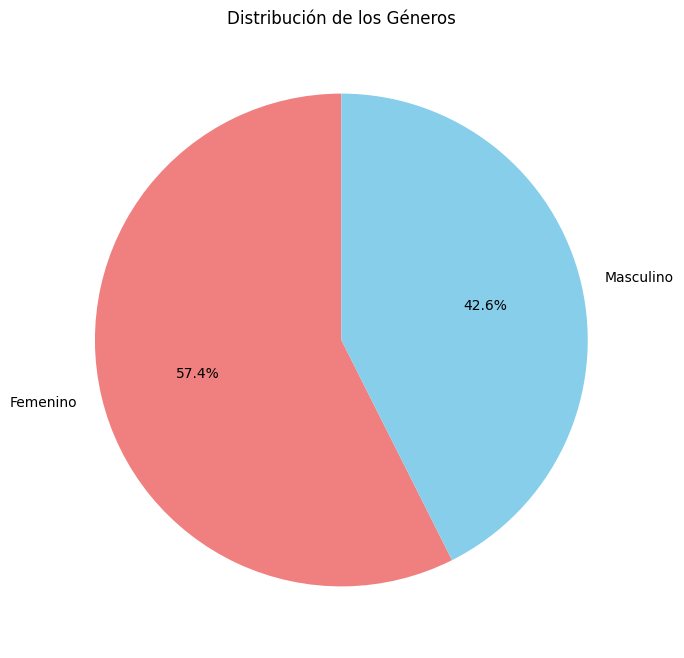

In [64]:
# Revisión de la distribución de los géneros
gender_counts = original_dataset_stroke['gender'].value_counts()
gender_labels = ['Masculino' if gender == 1 else 'Femenino' if gender == 0 else 'Otro' for gender in gender_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución de los Géneros')
plt.show()

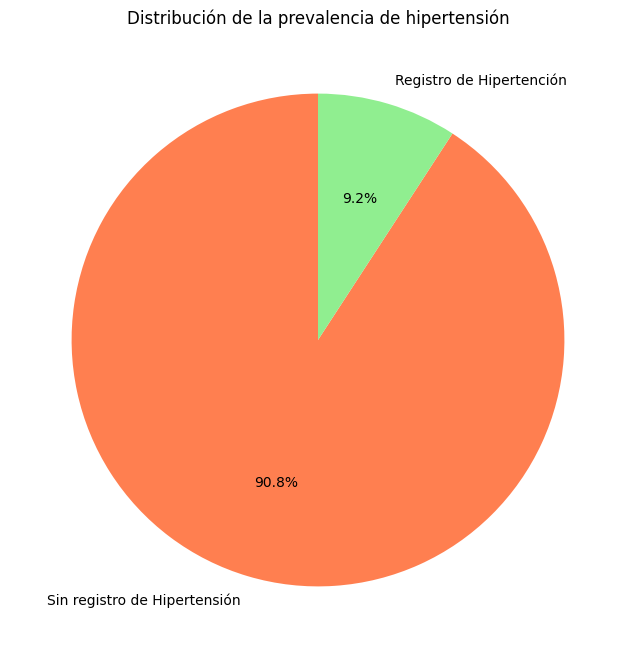

In [25]:
# Revisión de la distribución de la hipertensión
hipertension_counts = dataset['hypertension'].value_counts()
hipertension_labels = ['Registro de Hipertención' if hipertension == 1 else 'Sin registro de Hipertensión' for hipertension in hipertension_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(hipertension_counts, labels=hipertension_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de hipertensión')
plt.show()

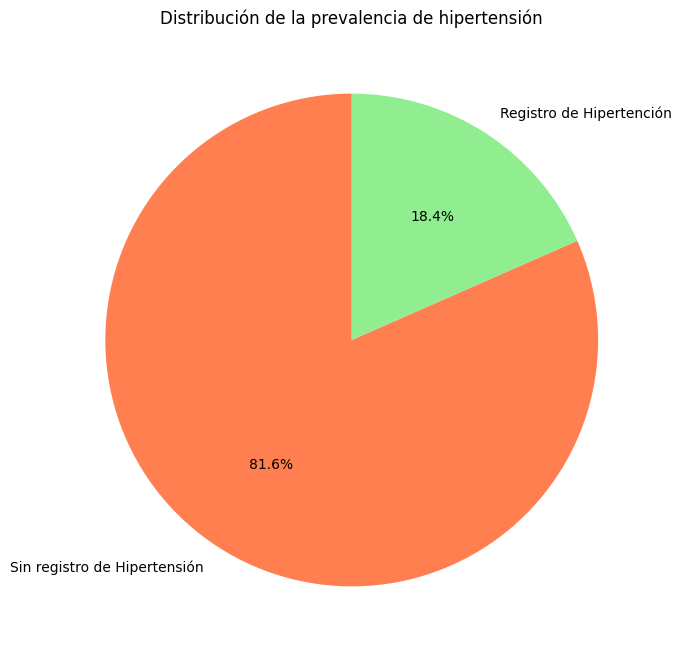

In [26]:
# Revisión de la distribución de la hipertensión
hipertension_counts = balanced_dataset['hypertension'].value_counts()
hipertension_labels = ['Registro de Hipertención' if hipertension == 1 else 'Sin registro de Hipertensión' for hipertension in hipertension_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(hipertension_counts, labels=hipertension_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de hipertensión')
plt.show()

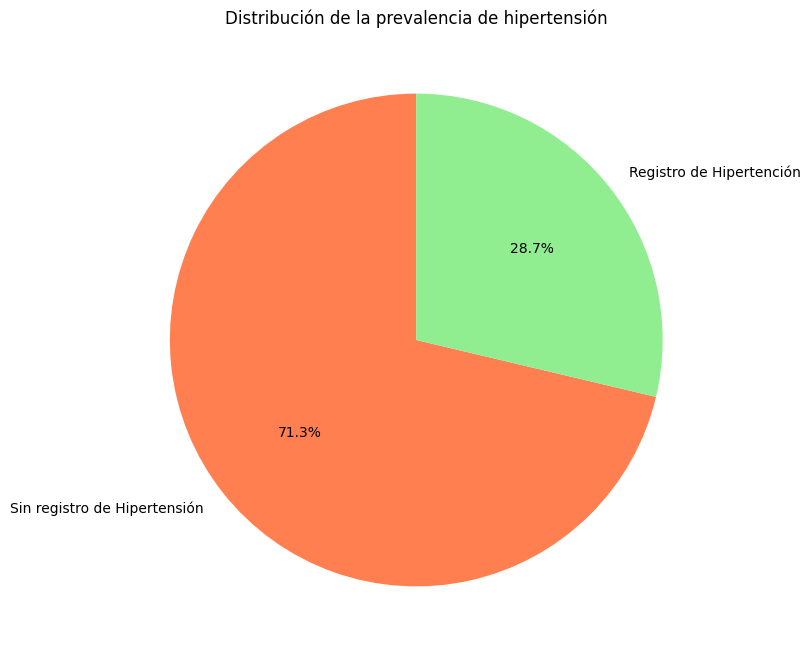

In [61]:
# Revisión de la distribución de la hipertensión
hipertension_counts = original_dataset_stroke['hypertension'].value_counts()
hipertension_labels = ['Registro de Hipertención' if hipertension == 1 else 'Sin registro de Hipertensión' for hipertension in hipertension_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(hipertension_counts, labels=hipertension_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de hipertensión')
plt.show()

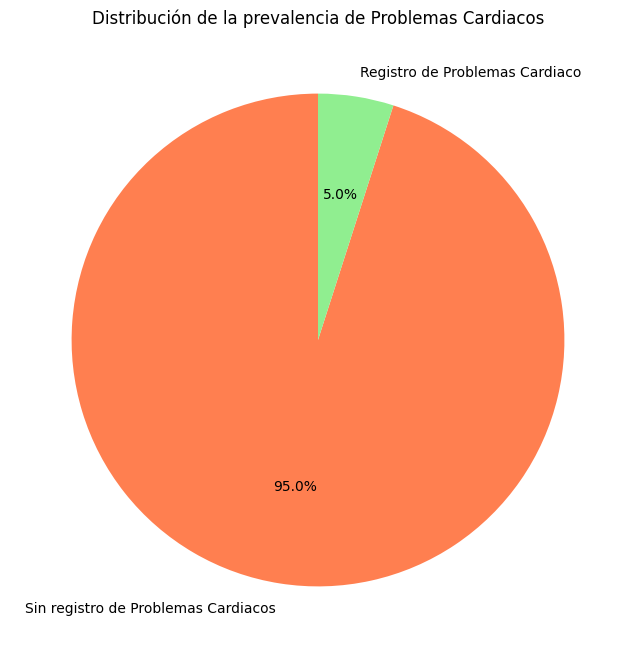

In [27]:
# Revisión de la distribución de los problemas cardiacos
heart_disease_counts = dataset['heart_disease'].value_counts()
heart_disease_labels = ['Registro de Problemas Cardiaco' if heart_disease == 1 else 'Sin registro de Problemas Cardiacos' for heart_disease in heart_disease_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de Problemas Cardiacos')
plt.show()

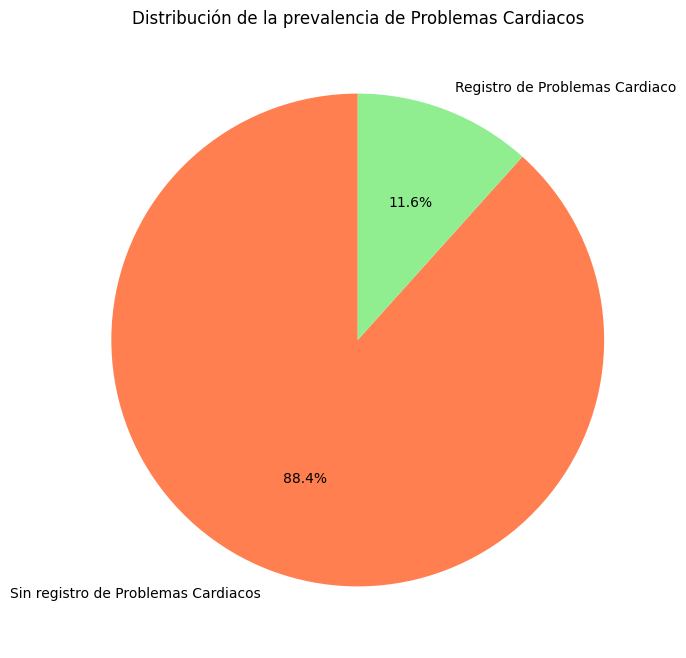

In [28]:
# Revisión de la distribución de los problemas cardiacos
heart_disease_counts = balanced_dataset['heart_disease'].value_counts()
heart_disease_labels = ['Registro de Problemas Cardiaco' if heart_disease == 1 else 'Sin registro de Problemas Cardiacos' for heart_disease in heart_disease_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de Problemas Cardiacos')
plt.show()

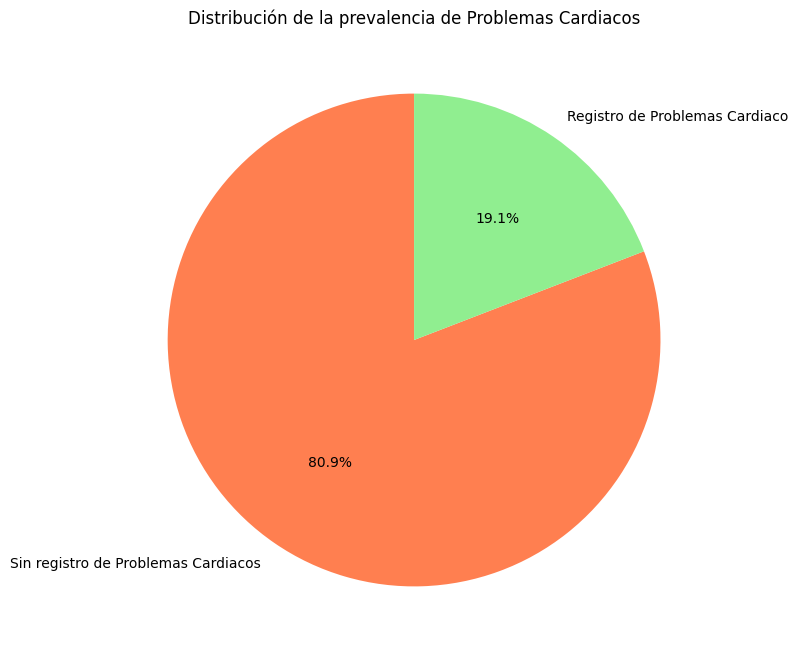

In [63]:
# Revisión de la distribución de los problemas cardiacos
heart_disease_counts = original_dataset_stroke['heart_disease'].value_counts()
heart_disease_labels = ['Registro de Problemas Cardiaco' if heart_disease == 1 else 'Sin registro de Problemas Cardiacos' for heart_disease in heart_disease_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de Problemas Cardiacos')
plt.show()

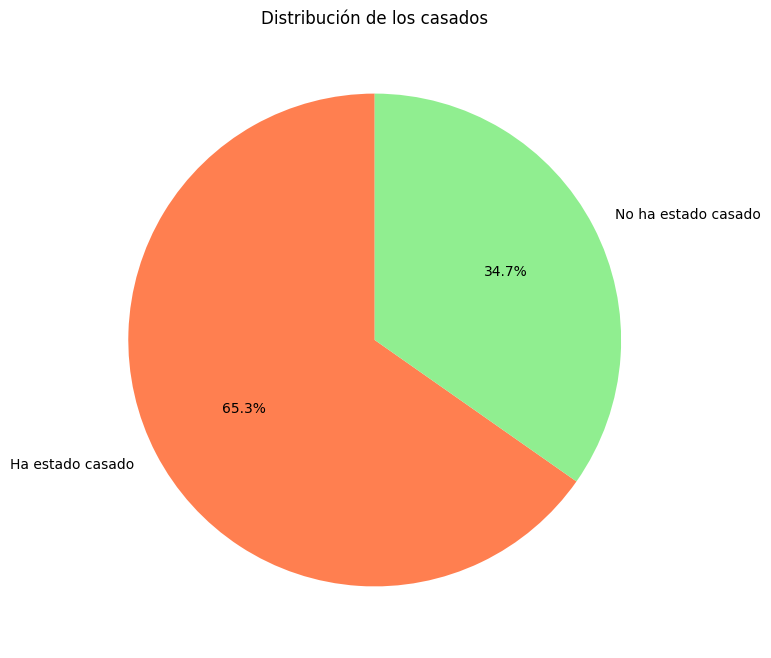

In [29]:
# Revisión de la distribución de los casados
ever_married_counts = dataset['ever_married'].value_counts()
ever_married_labels = ['Ha estado casado' if ever_married == 1 else 'No ha estado casado' for ever_married in ever_married_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(ever_married_counts, labels=ever_married_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de los casados')
plt.show()

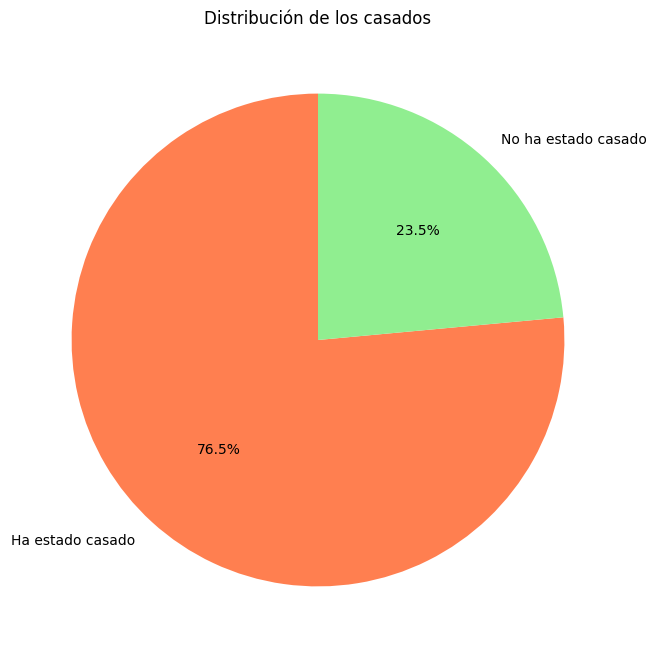

In [30]:
# Revisión de la distribución de los casados
ever_married_counts = balanced_dataset['ever_married'].value_counts()
ever_married_labels = ['Ha estado casado' if ever_married == 1 else 'No ha estado casado' for ever_married in ever_married_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(ever_married_counts, labels=ever_married_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de los casados')
plt.show()

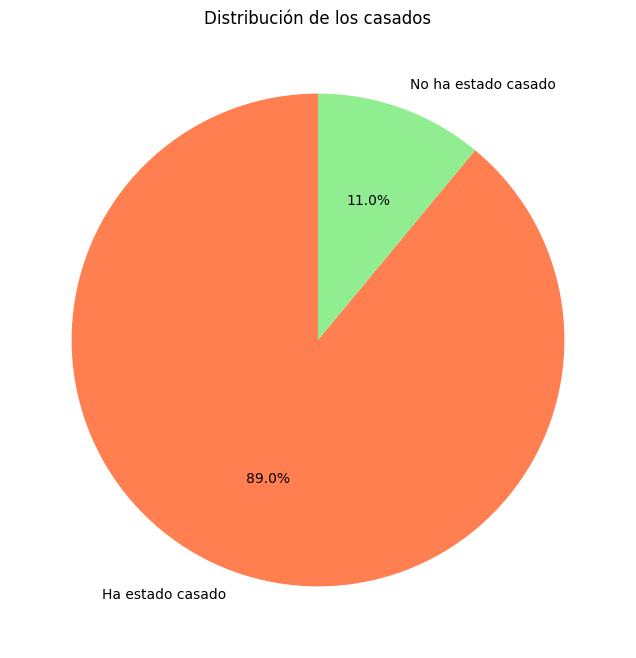

In [65]:
# Revisión de la distribución de los casados para stroke
ever_married_counts = original_dataset_stroke['ever_married'].value_counts()
ever_married_labels = ['Ha estado casado' if ever_married == 1 else 'No ha estado casado' for ever_married in ever_married_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(ever_married_counts, labels=ever_married_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de los casados')
plt.show()

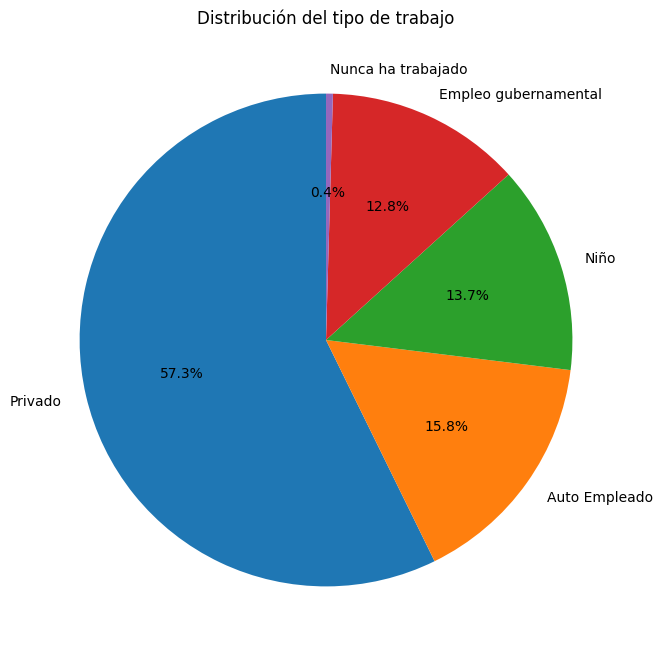

In [45]:
# Revisión del tipo de trabajo

# dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})

work_type_counts = dataset['work_type'].value_counts()
work_type_labels = ['Privado' if work_type == 4 else 'Auto Empleado' if work_type == 2 else 'Empleo gubernamental' if work_type == 3 else 'Niño' if work_type == 1 else 'Nunca ha trabajado' for work_type in work_type_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del tipo de trabajo')
plt.show()

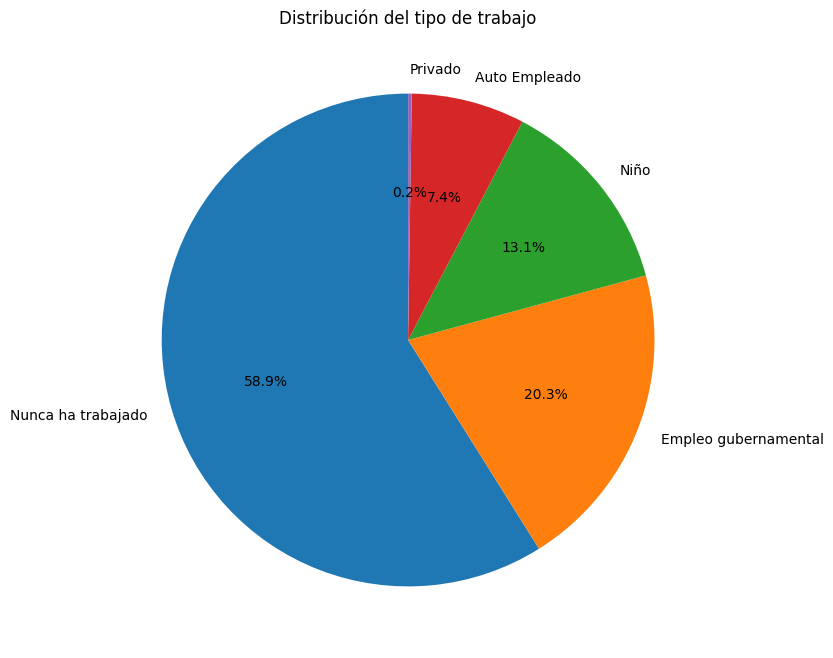

In [46]:
# Revisión del tipo de trabajo
work_type_counts = balanced_dataset['work_type'].value_counts()
work_type_labels = ['Privado' if work_type == 0 else 'Auto Empleado' if work_type == 1 else 'Empleo gubernamental' if work_type == 2 else 'Niño' if work_type == 3 else 'Nunca ha trabajado' for work_type in work_type_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del tipo de trabajo')
plt.show()

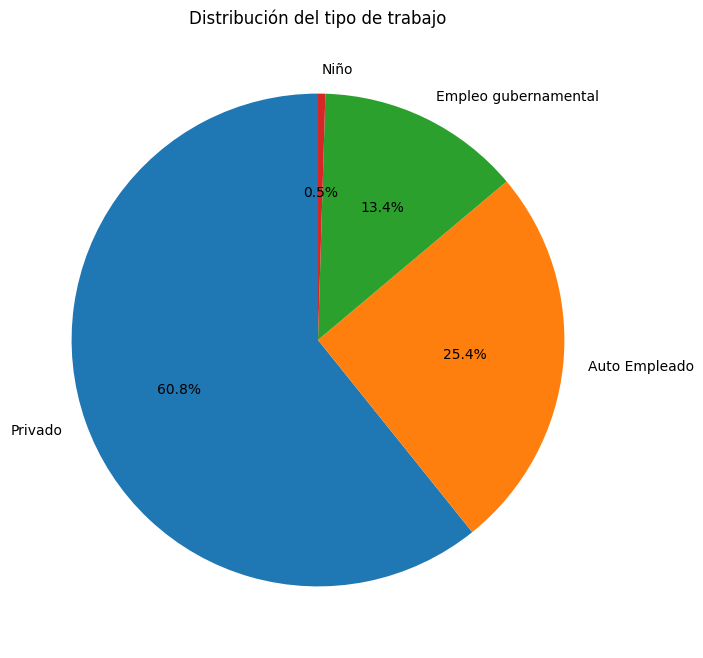

In [67]:
# Revisión del tipo de trabajo
work_type_counts = original_dataset_stroke['work_type'].value_counts()
work_type_labels = ['Privado' if work_type == 4 else 'Auto Empleado' if work_type == 2 else 'Empleo gubernamental' if work_type == 3 else 'Niño' if work_type == 1 else 'Nunca ha trabajado' for work_type in work_type_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del tipo de trabajo')
plt.show()

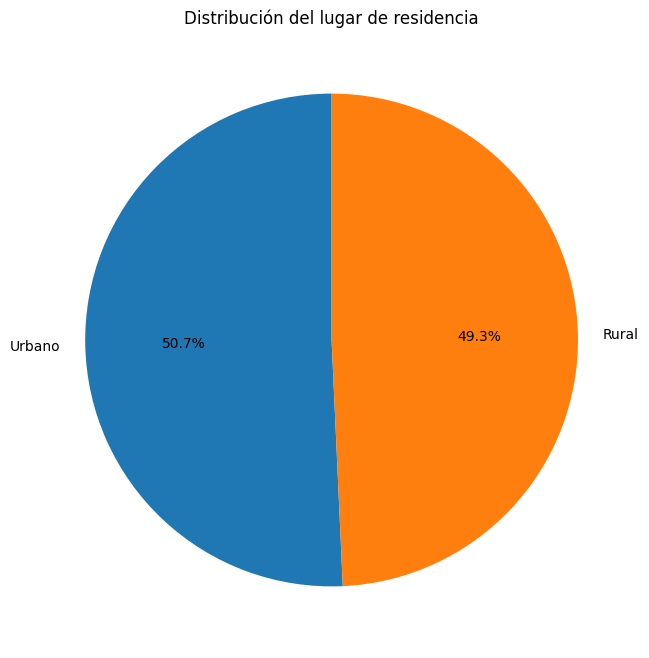

In [47]:
# Revisión de la distribución del lugar donde vive
Residence_type_counts = dataset['Residence_type'].value_counts()
Residence_type_labels = ['Rural' if Residence_type == 0 else 'Urbano' for Residence_type in Residence_type_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(Residence_type_counts, labels=Residence_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del lugar de residencia')
plt.show()

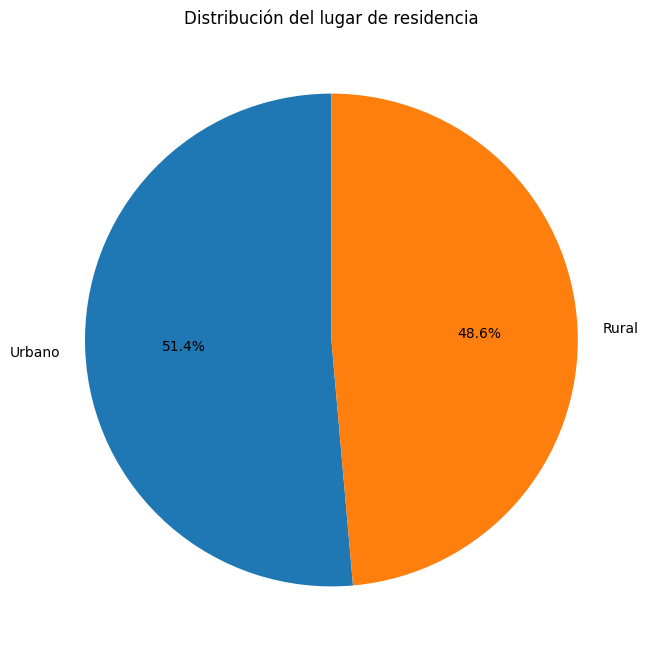

In [48]:
# Revisión de la distribución del lugar donde vive
Residence_type_counts = balanced_dataset['Residence_type'].value_counts()
Residence_type_labels = ['Rural' if Residence_type == 0 else 'Urbano' for Residence_type in Residence_type_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(Residence_type_counts, labels=Residence_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del lugar de residencia')
plt.show()

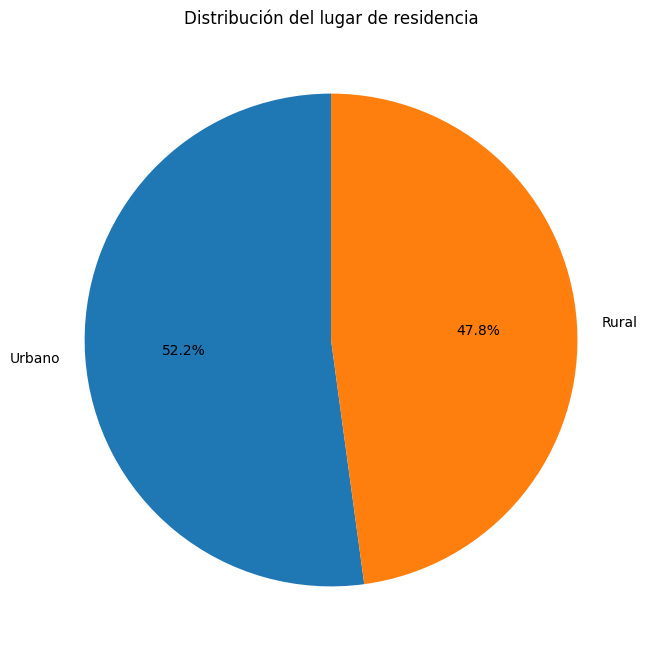

In [68]:
# Revisión de la distribución del lugar donde vive
Residence_type_counts = original_dataset_stroke['Residence_type'].value_counts()
Residence_type_labels = ['Rural' if Residence_type == 0 else 'Urbano' for Residence_type in Residence_type_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(Residence_type_counts, labels=Residence_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del lugar de residencia')
plt.show()

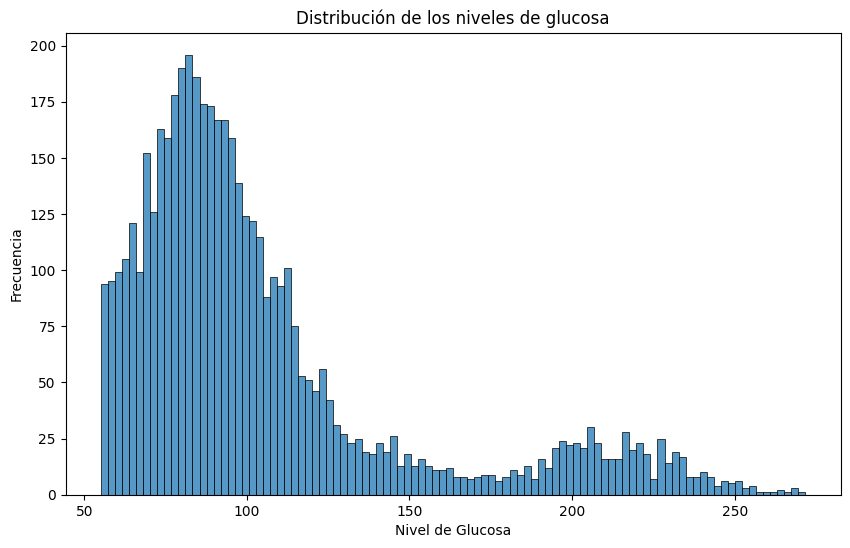

In [49]:
#Revisión de la distribución de los niveles de glucosa
plt.figure(figsize=(10, 6))
sns.histplot(dataset['avg_glucose_level'], bins=100)
plt.title('Distribución de los niveles de glucosa')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

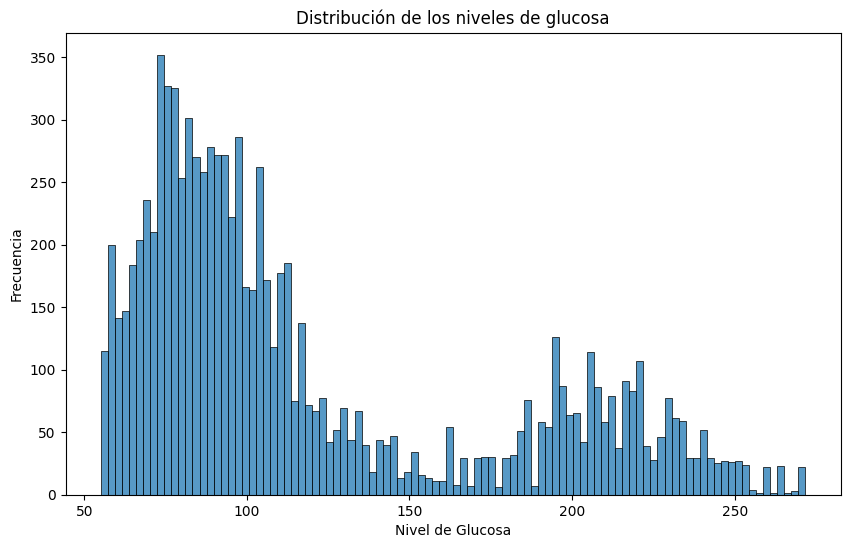

In [50]:
#Revisión de la distribución de los niveles de glucosa
plt.figure(figsize=(10, 6))
sns.histplot(balanced_dataset['avg_glucose_level'], bins=100)
plt.title('Distribución de los niveles de glucosa')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

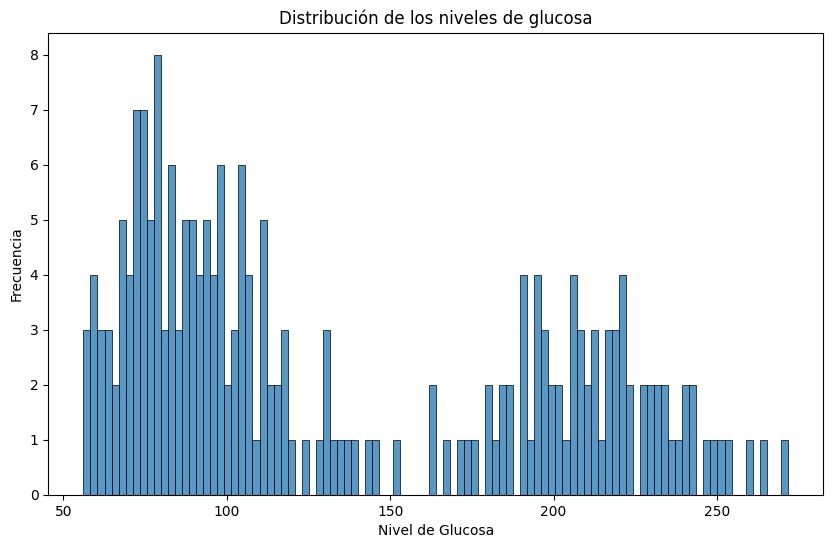

In [69]:
#Revisión de la distribución de los niveles de glucosa para stroke
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset_stroke['avg_glucose_level'], bins=100)
plt.title('Distribución de los niveles de glucosa')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

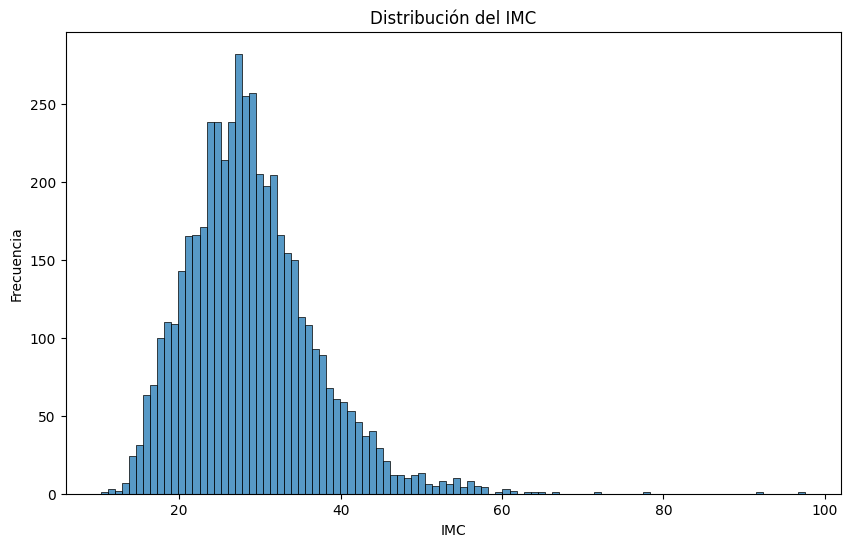

In [51]:
# Revisión de la distribución del IMC
plt.figure(figsize=(10, 6))
sns.histplot(dataset['bmi'], bins=100)
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

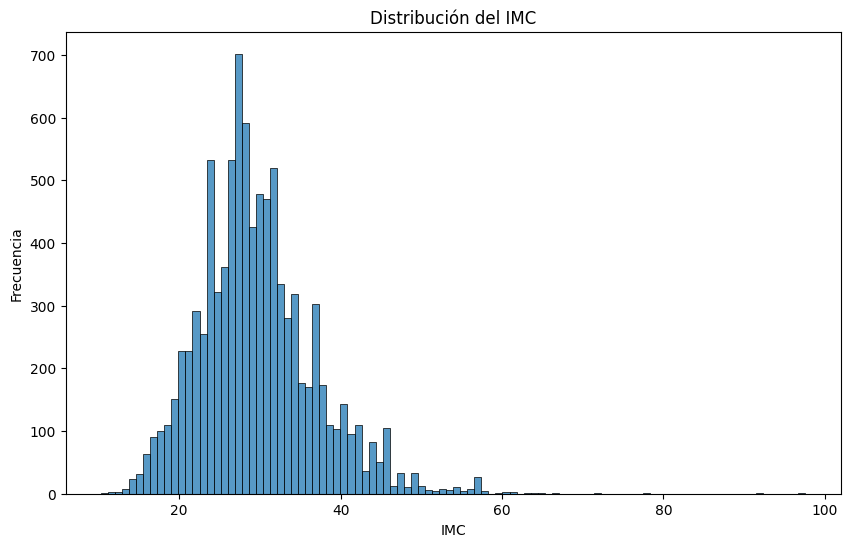

In [52]:
# Revisión de la distribución del IMC
plt.figure(figsize=(10, 6))
sns.histplot(balanced_dataset['bmi'], bins=100)
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

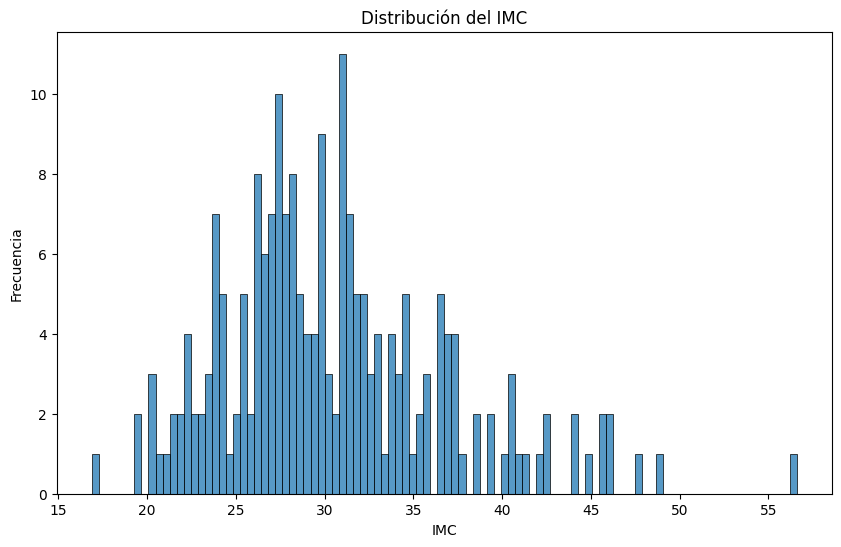

In [70]:
# Revisión de la distribución del IMC
plt.figure(figsize=(10, 6))
sns.histplot(original_dataset_stroke['bmi'], bins=100)
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

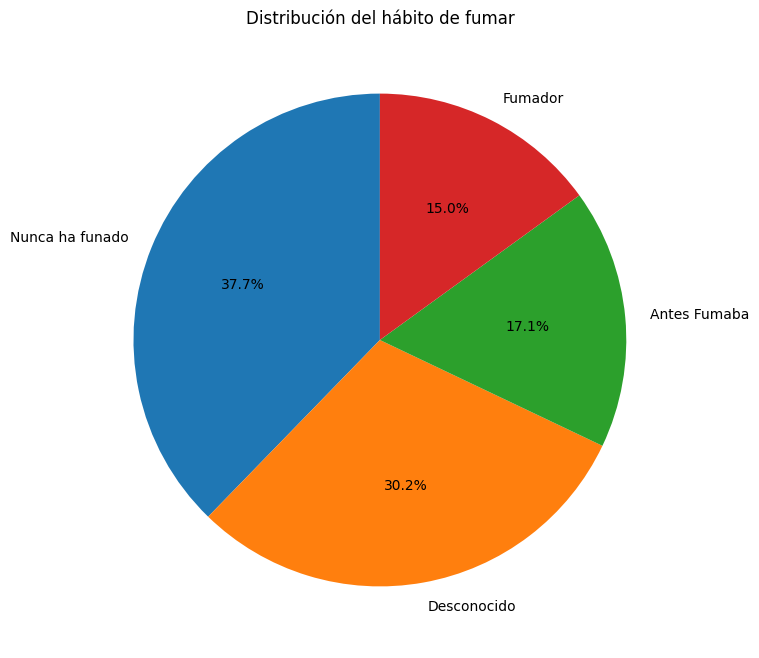

In [53]:
# Revisión de la distribución del hábito de fumar
smoking_status_counts = dataset['smoking_status'].value_counts()
smoking_status_labels = ['Desconocido' if smoking_status == 0 else 'Nunca ha funado' if smoking_status == 1 else 'Antes Fumaba' if smoking_status == 2 else 'Fumador' for smoking_status in smoking_status_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del hábito de fumar')
plt.show()

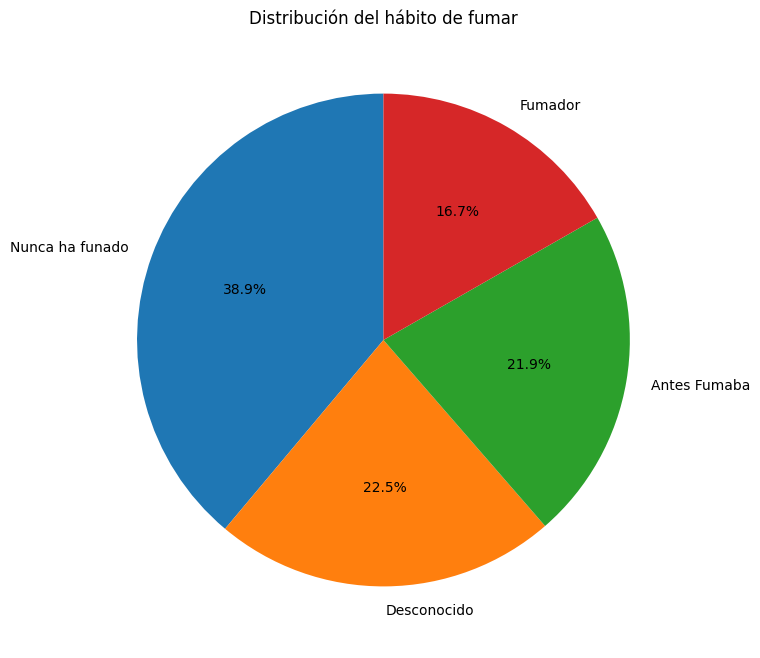

In [54]:
# Revisión de la distribución del hábito de fumar
smoking_status_counts = balanced_dataset['smoking_status'].value_counts()
smoking_status_labels = ['Desconocido' if smoking_status == 0 else 'Nunca ha funado' if smoking_status == 1 else 'Antes Fumaba' if smoking_status == 2 else 'Fumador' for smoking_status in smoking_status_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del hábito de fumar')
plt.show()

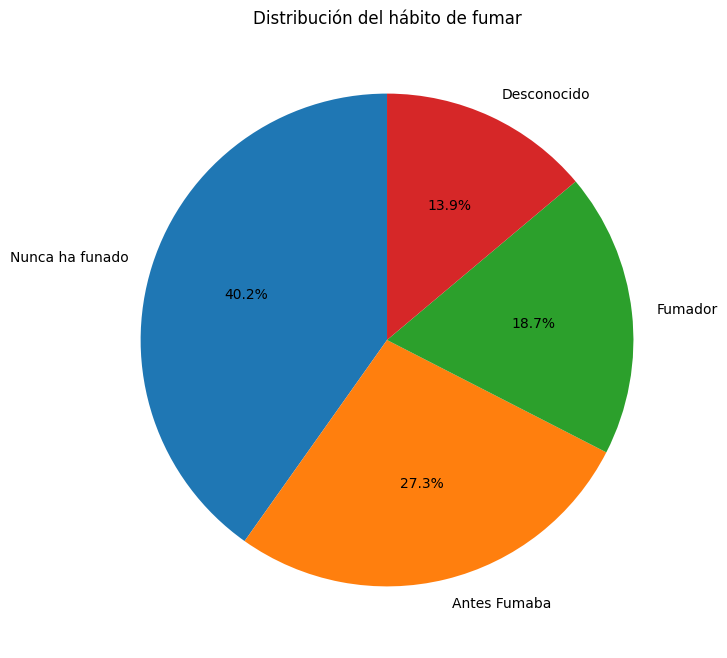

In [71]:
# Revisión de la distribución del hábito de fumar
smoking_status_counts = original_dataset_stroke['smoking_status'].value_counts()
smoking_status_labels = ['Desconocido' if smoking_status == 0 else 'Nunca ha funado' if smoking_status == 1 else 'Antes Fumaba' if smoking_status == 2 else 'Fumador' for smoking_status in smoking_status_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del hábito de fumar')
plt.show()

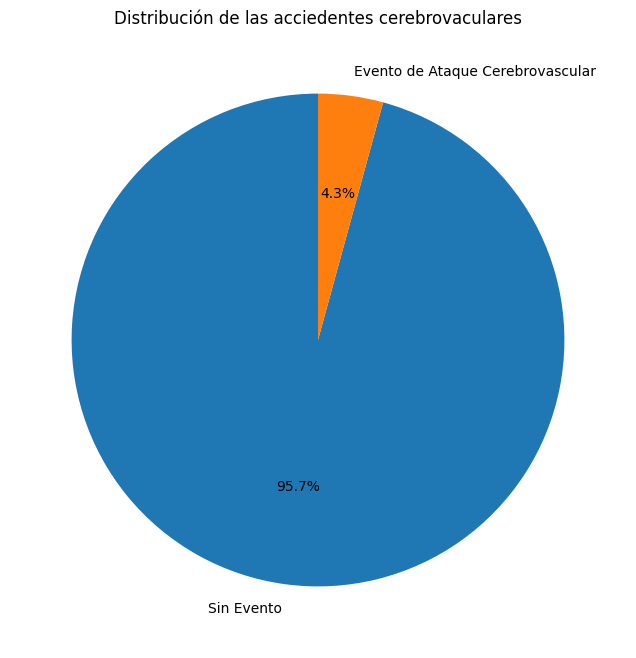

In [55]:
# REvisión de la distribución de ataque cerebrovascular
stroke_counts = dataset['stroke'].value_counts()
stroke_labels = ['Evento de Ataque Cerebrovascular' if stroke == 1 else 'Sin Evento' for stroke in stroke_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las acciedentes cerebrovaculares')
plt.show()

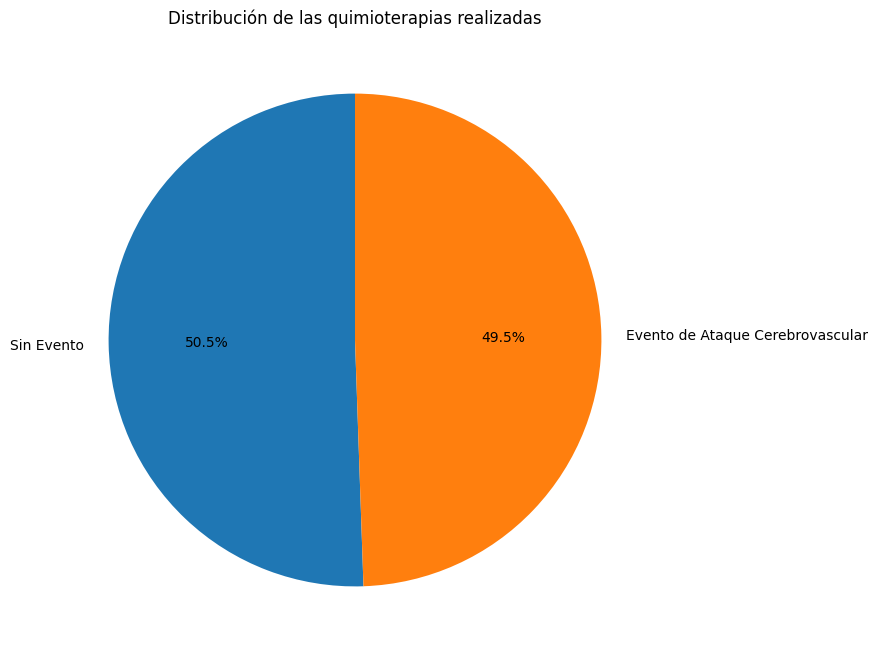

In [56]:
# REvisión de la distribución de ataque cerebrovascular
stroke_counts = balanced_dataset['stroke'].value_counts()
stroke_labels = ['Evento de Ataque Cerebrovascular' if stroke == 1 else 'Sin Evento' for stroke in stroke_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las quimioterapias realizadas')
plt.show()

In [ ]:
# REvisión de la distribución de ataque cerebrovascular
stroke_counts = dataset['stroke'].value_counts()
stroke_labels = ['Evento de Ataque Cerebrovascular' if stroke == 1 else 'Sin Evento' for stroke in stroke_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las acciedentes cerebrovaculares')
plt.show()